In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = pd.read_excel('sales_data.xlsx')

In [4]:
date = pd.read_excel('date.xlsx')

In [5]:
sales_ori = sales
date_ori = date

In [6]:
sales.shape

(541909, 8)

In [7]:
date.shape

(541909, 6)

In [8]:
sales.head(10)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [9]:
date_new = date.drop_duplicates()
date_new

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
7,2010-12-01 08:28:00,2010-12-01,Wednesday,1,December,08:28:00
9,2010-12-01 08:34:00,2010-12-01,Wednesday,1,December,08:34:00
25,2010-12-01 08:35:00,2010-12-01,Wednesday,1,December,08:35:00
26,2010-12-01 08:45:00,2010-12-01,Wednesday,1,December,08:45:00
...,...,...,...,...,...,...
541865,2011-12-09 12:23:00,2011-12-09,Friday,9,December,12:23:00
541867,2011-12-09 12:25:00,2011-12-09,Friday,9,December,12:25:00
541869,2011-12-09 12:31:00,2011-12-09,Friday,9,December,12:31:00
541890,2011-12-09 12:49:00,2011-12-09,Friday,9,December,12:49:00


In [10]:
!pip install fuzzywuzzy
!pip install chardet

In [11]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

C:\Users\Riya\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:
countries = sales['transaction country'].unique()
countries.sort()
countries

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

In [13]:
len(countries)

38

In [12]:
customerids = sales['customer id'].unique()
print(len(customerids))
customerids

4373


array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [13]:
productids = sales['product id'].unique()
print(len(productids))
productids

4070


array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [14]:
products = sales['product description'].unique()
print(len(products))
products

4224


array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [15]:
# convert to lower case
sales['product description'] = sales['product description'].str.lower()
# remove trailing white spaces
sales['product description'] = sales['product description'].str.strip()

In [16]:
sales = sales.drop_duplicates()
sales.shape

(536641, 8)

In [17]:
products = sales['product description'].unique()
print(len(products))
products

4194


array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'lost',
       'cream hanging heart t-light holder',
       'paper craft , little birdie'], dtype=object)

In [18]:
# missing data points per colummn
missing_values_count = sales.isnull().sum()
missing_values_count

transaction id                0
product id                    0
product description        1455
quantity sold                 0
transaction timestamp         0
unit price                    0
customer id              135037
transaction country           0
dtype: int64

In [19]:
sales.dtypes

transaction id                   object
product id                       object
product description              object
quantity sold                     int64
transaction timestamp    datetime64[ns]
unit price                      float64
customer id                     float64
transaction country              object
dtype: object

In [20]:
# sales.info()

In [21]:
sales.describe()

,quantity sold,unit price,customer id
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
count = (sales['unit price'] < 0).sum().sum()
count

2

In [23]:
count = (sales['quantity sold'] < 0).sum().sum()
count

10587

In [24]:
sales = sales[(sales['quantity sold']>=0)]
sales = sales[(sales['unit price']>=0)]
sales.describe()

,quantity sold,unit price,customer id
count,526052.000000,526052.000000,392732.000000
mean,10.730911,3.913818,15287.734822
std,157.592136,36.053205,1713.567773
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [25]:
print(sales['quantity sold'].value_counts())

1       144493
2        81245
12       60858
6        40656
4        38393
         ...  
196          1
4800         1
193          1
701          1
512          1
Name: quantity sold, Length: 393, dtype: int64


In [26]:
#sales['quantity sold'] = sales['quantity sold'].abs()
#print(sales['quantity sold'].value_counts())

In [27]:
# most sold product
sales.groupby(['product id']).sum().sort_values('quantity sold', ascending=False)

,quantity sold,unit price,customer id
product id,,,
23843,80995,2.08,16446.0
23166,78033,367.12,3047321.0
22197,56898,1479.76,16366320.0
84077,54951,171.91,7213288.0
85099B,48375,5243.39,24700699.0
...,...,...,...
90020,1,12.48,0.0
90021,1,11.95,15891.0
90068,1,7.50,0.0


In [28]:
# free things
free = sales.loc[sales['unit price'] == 0.0]
free

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,polyester filler pad 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,polyester filler pad 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom


In [29]:
sales = sales[(sales['unit price']!=0)]

In [30]:
sales['Total Price'] = sales['unit price'] * sales['quantity sold']
sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,Total Price
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


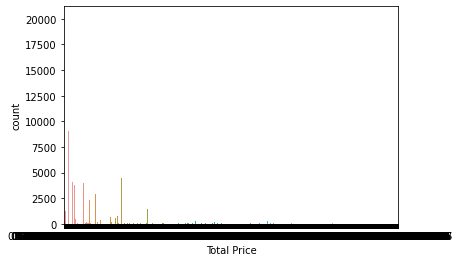

In [31]:
ax = sns.countplot(x='Total Price',data=sales)

In [32]:
sales['Total Price'].describe()

count    524878.000000
mean         20.275399
std         271.693566
min           0.001000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: Total Price, dtype: float64

In [33]:
# which product has highest total price
sales.groupby('product id').sum().sort_values('Total Price', ascending=False).head(10)

,quantity sold,unit price,customer id,Total Price
product id,,,,
DOT,706,206248.77,225536.0,206248.77
22423,13851,28065.76,25637419.0,174156.54
23843,80995,2.08,16446.0,168469.60
85123A,37641,7024.49,31482068.0,104462.75
47566,18283,9850.68,21362286.0,99445.23
85099B,48371,5243.39,24700699.0,94159.81
23166,78033,367.12,3047321.0,81700.92
POST,3150,34992.23,14015033.0,78101.88
M,6984,74098.73,4302563.0,77750.27


In [34]:
# which country sold most
sales.groupby('transaction country').sum().sort_values('Total Price', ascending=False)['Total Price'].head(5)

transaction country
United Kingdom    9.001744e+06
Netherlands       2.854463e+05
EIRE              2.831405e+05
Germany           2.286784e+05
France            2.096254e+05
Name: Total Price, dtype: float64

In [35]:
sales.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'Total Price'],
      dtype='object')

In [36]:
sales.sort_values('Total Price', ascending=False)['Total Price'].head(5)

540421    168469.60
61619      77183.60
222680     38970.00
15017      13541.33
299982     11062.06
Name: Total Price, dtype: float64